In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

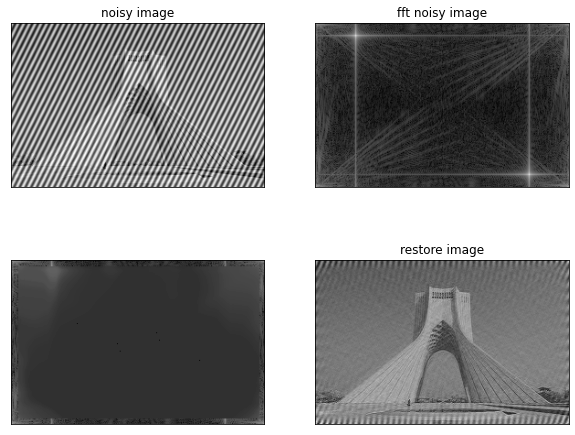

In [34]:
img = cv2.imread("azadi_tower.jpg", cv2.IMREAD_GRAYSCALE)
imgd = cv2.normalize(img.astype('float'), None, 0.0, 1.0, cv2.NORM_MINMAX)

# Apply periodic noise
[m, n] = imgd.shape
[a, b] = np.meshgrid(range(0, n), range(0, m))
periodic_noise = np.sin(a+b/2)+1
noisy_img = (imgd + periodic_noise)/2

# noisy_image in frequency domain
fft_noisy_image = np.fft.fft2(noisy_img)
fft_shift_noisy_image = np.fft.fftshift(fft_noisy_image)
imgF_d = np.abs(fft_shift_noisy_image)
img_log = np.log(1+imgF_d)
max_val = np.max(np.max(img_log))

# width of window
w = 15
# threshold value
T = 0.01

theta = np.angle(fft_noisy_image) 
IMgFd = np.abs(fft_noisy_image)
IMGLog = np.log(1 + IMgFd)
Max = np.max(np.max(IMGLog))


Fimage = IMgFd

for kk in range((w // 2 + 1), (m- (w // 2) +1)):
    for j in range((w // 2 + 1), (n- (w // 2) +1)):
        win = IMgFd[(kk - w // 2):(kk + np.ceil(w / 2 - 1)).astype('int'), 
                    (j - w // 2): (j + np.ceil(w / 2 - 1)).astype('int')]
        median = np.median(win[:])
        o = IMgFd[kk, j] / median
        if o >= T:
            Fimage[kk, j] = median
        # else:
        #     Fimage[kk, j] = IMgFd[kk, j]


Fimage_d = np.abs(Fimage)
Fimage_log = np.log(1 + Fimage_d)
Fimage_log_Max = np.max(np.max(Fimage_log))

# compound phase angle and proceed amplitude
Z = Fimage_d * np.exp((theta)*1j)
imginv = np.abs(np.fft.ifft2(Z)) 
max_imginv = np.max(np.max(imginv))

fig, axes= plt.subplots(2, 2, figsize=(10, 8))
axes[0,0].imshow(noisy_img, cmap='gray')
axes[0,0].set_title('noisy image')

axes[0,1].imshow(IMGLog / Max, cmap='gray')
axes[0,1].set_title('fft noisy image')

axes[1,0].imshow(Fimage_log/Fimage_log_Max, cmap='gray')
axes[1,0].set_title('')
# print((Fimage_log/Fimage_log_Max).shape)

axes[1,1].imshow(imginv/max_imginv, cmap='gray')
axes[1,1].set_title('restore image')

for ax in axes.ravel():
    ax.set_xticks([])
    ax.set_yticks([])


plt.show()

cv2.waitKey(0)
cv2.destroyAllWindows()
